In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('../nycflights13_weather.csv.gz', comment = '#')

In [3]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [4]:
weather['tempC'] = weather.temp * 5/9 - 32

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26130 entries, 0 to 26129
Data columns (total 16 columns):
origin        26130 non-null object
year          26130 non-null int64
month         26130 non-null int64
day           26130 non-null int64
hour          26130 non-null int64
temp          26129 non-null float64
dewp          26129 non-null float64
humid         26129 non-null float64
wind_dir      25712 non-null float64
wind_speed    26127 non-null float64
wind_gust     26127 non-null float64
precip        26130 non-null float64
pressure      23400 non-null float64
visib         26130 non-null float64
time_hour     26130 non-null object
tempC         26129 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 3.2+ MB


In [6]:
weather.time_hour = pd.DatetimeIndex(weather.time_hour)

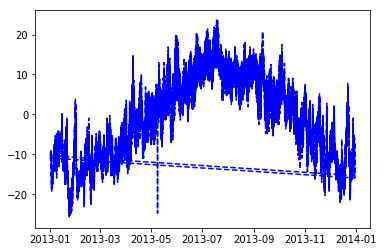

In [7]:
plt.plot(weather.time_hour, weather.tempC, 'b--')
plt.show()

In [8]:
weather = weather.set_index(weather.time_hour)

In [9]:
weather_daily = weather.resample('D').mean()

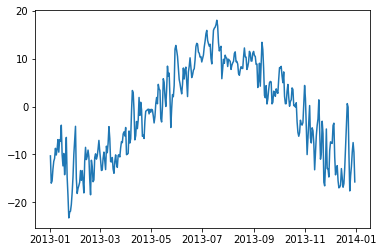

In [10]:
plt.plot(weather_daily.index, weather_daily.tempC)
plt.show()

In [11]:
hottest_days = weather_daily.tempC.nlargest(7).reset_index()

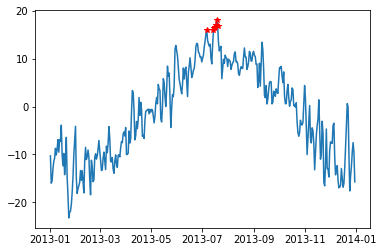

In [12]:
plt.plot(weather_daily.index, weather_daily.tempC)
plt.plot(hottest_days.time_hour, hottest_days.tempC, 'r*')
plt.show()